## Problem: Advect a top-hat function

Write a code to solve the 1-d linear advection equation using a first-order explicit (upwind) discretisation scheme:

$$u_i^{j+1} =u_i^j - c\frac{\Delta t}{\Delta x}(u_i^j - u_{i-1}^j )$$


on the domain $[0,1]$ with $c=1$ and periodic boundary conditions. For initial conditions, try a top-hat function:

$$ 
u(x,0)= 
     \begin{cases}
       0, & x < 1/3\\
       1, & 1/3 \leq x \leq 2/3,\\
       0, & x > 2/3,\\
     \end{cases}
$$

**Note:**

For a general treatment of boundary conditions, you would initialize the ghost points to their corresponding periodic data and apply the difference equations to zones $0,..., N − 1$. However, for periodic BCs on this grid, points $0$ and $N − 1$ are identical, so you could do the update in this special case on points $1,..., N − 1$ without the need for ghost points and then set $u_0 = u_N−1$ after the update.

Run you program for one or more periods (one period is $T = 1/c$) with several different CFL numbers and notice that there is substantial numerical dissipation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Create the domain:

In [2]:
# Create domain
xmin = 0.
xmax = 1.

# Number of points on the grid
nx = 1001

# Number of ghost cells
ng = 1

# Step size
delta_x = (xmax - xmin)/(nx - 1)

# Define x-axis
x = np.arange(xmin - ng*delta_x , xmax + (ng + 1)*delta_x, delta_x)

print(x.shape)
#print(x)

(1003,)


### 2. Define the initial profile:

In [3]:
def top_hat(x):
    
    """
    Top-hat function
    """
    
    if (1/3 <= x <= 2/3):
        return 1.0
    else:
        return 0.0

In [4]:
# Empy list for the y axis
y = []


# Fill in the elements of the list by eveluating our piece-wise function

for j in range(len(x)):
    
    y.append(top_hat(x[j]))

y = np.array(y)

print(x.shape, y.shape)

(1003,) (1003,)


### 3. Plotting the initial profile (top-hat:)

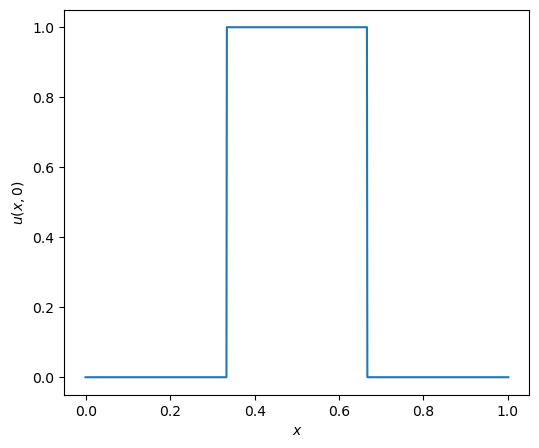

In [5]:
# Plot the initial profile

plt.figure(figsize = (6,5))

plt.plot(x, y)

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,0)$")
plt.show()



### 4. Create an empty solution array:

In [6]:
# Empty array that will store our slns
u_sln0 = np.zeros((len(x)), dtype=np.float64) # For the IC
u_sln  = np.zeros((len(x)), dtype=np.float64) # For the t-dependent sln

print(u_sln0.shape, u_sln.shape)

(1003,) (1003,)


In [7]:
# This is the initial vector
y_0 = y.copy()
u_sln0 = y.copy()

# Alternative code for the initial vector

#u_sln0[:] = 0.0
#u_sln0[np.logical_and(x >= 1./3., x <= 2./3.)] = 1.0
#print(u_sln0.shape)

#print(u_sln0)

### 5. UPWIND Discretisation: 

In [8]:
# Courant number
cfl = 1.0 ## <= 1

# Perturbation speed
c = 1.0

#### Time step:

$$\Delta t= \frac{\Delta x\,\cal C}{c}$$


#### Period:

$${\cal T}=\frac{L}{c}$$

In [9]:
# Time step
delta_t = cfl*delta_x/c

# Time -> 1 period so that the profile stays on spot
t_period = (xmax - xmin)/c

print(t_period)

1.0


#### Simulation:

In [10]:
# Initialise time at t=0
t = 0.

#print(Ng-1, Nx+Ng-2)
#print(Ng+1, Nx+Ng)

# While statement
while t < 3*t_period:
    
    # Adding BCs
    u_sln0[ng-1]  = u_sln0[nx+ng-2]
    u_sln0[nx+ng] = u_sln0[ng+1]
    
    for i in range(ng, ng+nx):
        u_sln[i] = u_sln0[i] - cfl*(u_sln0[i] - u_sln0[i-1])
        
    u_sln0[:] = u_sln[:]
    t += delta_t

In [11]:
print(u_sln)

[0. 0. 0. ... 0. 0. 0.]


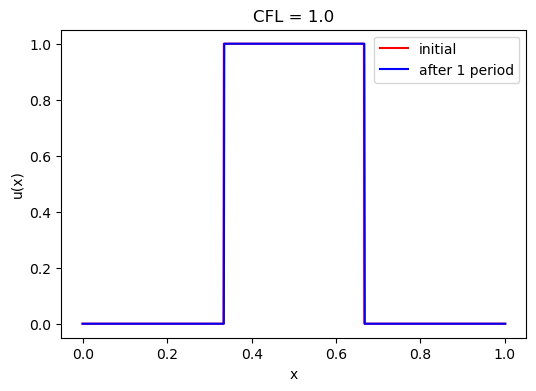

In [12]:
    
# Plot the initial profile

plt.figure(figsize = (6,4))
plt.title(f"CFL = {cfl}")
plt.plot(x, y_0, color = "red", label ="initial")
plt.plot(x, u_sln, color = "blue", label="after 1 period")

plt.xlabel(r"x")
plt.ylabel(r"u(x)")
plt.legend()
plt.show()

In [14]:
# Define low and high indices
ilo = ng
ihi = ng+nx-1

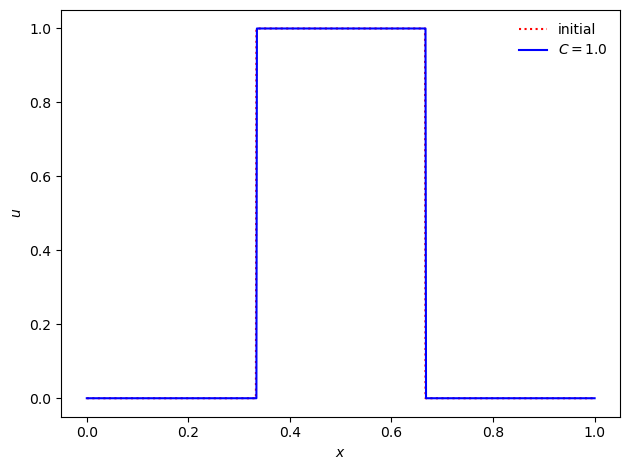

In [16]:
plt.plot(x[ng:ng+nx], y_0[ng:ng+nx], ls=":", color = 'red', label="initial")

plt.plot(x[ng:ng+nx],u_sln[ng:ng+nx], color = 'blue', label=r"$C = {}$".format(cfl))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

(1003,) (1003,)


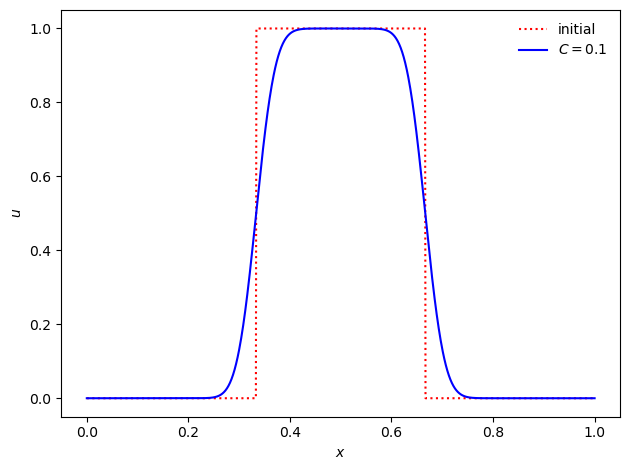

In [18]:
# Empty array that will store our slns
u_sln0 = np.zeros((len(x)), dtype=np.float64)
u_sln  = np.zeros((len(x)), dtype=np.float64)

print(u_sln0.shape, u_sln.shape)

# This is the initial vector
y_0 = y.copy()
u_sln0 = y.copy()

# Alternative code for the initial vector

#u_sln0[:] = 0.0
#u_sln0[np.logical_and(x >= 1./3., x <= 2./3.)] = 1.0
#print(u_sln0.shape)

#print(u_sln0)

# Time discretisation
cfl = 0.1 ## <= 1
c = 1.0

# Time step
delta_t = cfl*delta_x/c

# Time -> 1 period so that the profile stays on spot
t_period = (xmax - xmin)/c

# Initialise time at t=0
t = 0.

#print(ng-1, nx+ng-2)
#print(ng+1, nx+ng)

# While statement
while t < t_period:
    
    u_sln0[ng-1]  = u_sln0[nx+ng-2]
    u_sln0[nx+ng] = u_sln0[ng+1]
    
    for i in range(ng, ng+nx):
        u_sln[i] = u_sln0[i] - cfl*(u_sln0[i] - u_sln0[i-1])
        
    u_sln0[:] = u_sln[:]
    t += delta_t

    
# Plot the initial profile

plt.plot(x[ng:ng+nx], y_0[ng:ng+nx], ls=":", color = 'red', label="initial")

plt.plot(x[ng:ng+nx],u_sln[ng:ng+nx], color = 'blue', label=r"$C = {}$".format(cfl))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

(1003,) (1003,)


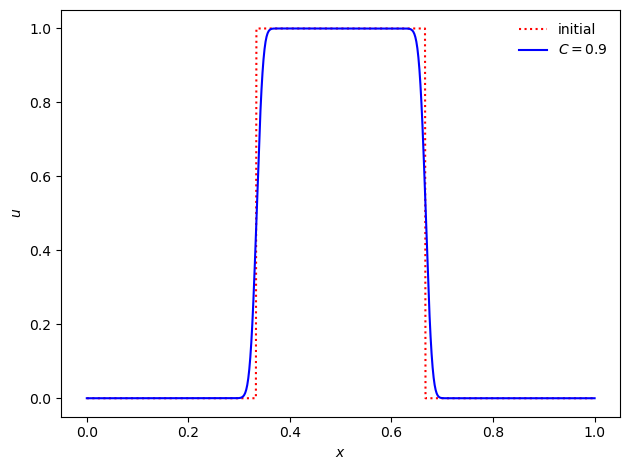

In [20]:
# Empty array that will store our slns
u_sln0 = np.zeros((len(x)), dtype=np.float64)
u_sln  = np.zeros((len(x)), dtype=np.float64)

print(u_sln0.shape, u_sln.shape)

# This is the initial vector
y_0 = y.copy()
u_sln0 = y.copy()

# Alternative code for the initial vector

#u_sln0[:] = 0.0
#u_sln0[np.logical_and(x >= 1./3., x <= 2./3.)] = 1.0
#print(u_sln0.shape)

#print(u_sln0)

# Time discretisation
cfl = 0.9 ## <= 1
c = 1.0

# Time step
delta_t = cfl*delta_x/c

# Time -> 1 period so that the profile stays on spot
t_period = (xmax - xmin)/c

# Initialise time at t=0
t = 0.

#print(ng-1, nx+ng-2)
#print(ng+1, nx+ng)

# While statement
while t < t_period:
    
    u_sln0[ng-1]  = u_sln0[nx+ng-2]
    u_sln0[nx+ng] = u_sln0[ng+1]
    
    for i in range(ng, ng+nx):
        u_sln[i] = u_sln0[i] - cfl*(u_sln0[i] - u_sln0[i-1])
        
    u_sln0[:] = u_sln[:]
    t += delta_t

    
# Plot the initial profile

plt.plot(x[ng:ng+nx], y_0[ng:ng+nx], ls=":", color = 'red', label="initial")

plt.plot(x[ng:ng+nx],u_sln[ng:ng+nx], color = 'blue', label=r"$C = {}$".format(cfl))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

(1003,) (1003,)


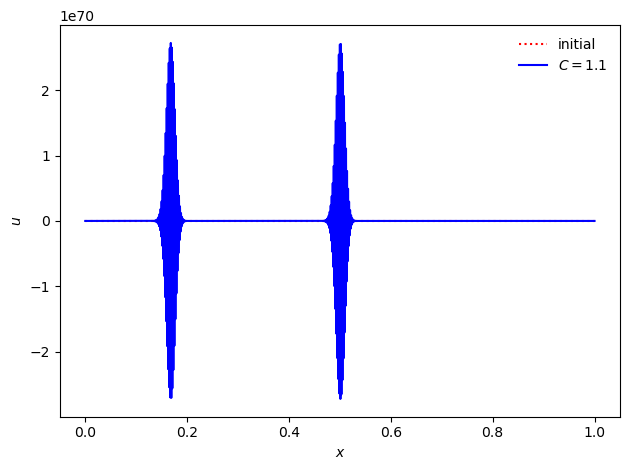

In [22]:
# Empty array that will store our slns
u_sln0 = np.zeros((len(x)), dtype=np.float64)
u_sln  = np.zeros((len(x)), dtype=np.float64)

print(u_sln0.shape, u_sln.shape)

# This is the initial vector
y_0 = y.copy()
u_sln0 = y.copy()

# Alternative code for the initial vector

#u_sln0[:] = 0.0
#u_sln0[np.logical_and(x >= 1./3., x <= 2./3.)] = 1.0
#print(u_sln0.shape)

#print(u_sln0)

# Time discretisation
cfl = 1.1 ## <= 1
c = 1.0

# Time step
delta_t = cfl*delta_x/c

# Time -> 1 period so that the profile stays on spot
t_period = (xmax - xmin)/c

# Initialise time at t=0
t = 0.

#print(ng-1, nx+ng-2)
#print(ng+1, nx+ng)

# While statement
while t < t_period:
    
    u_sln0[ng-1]  = u_sln0[nx+ng-2]
    u_sln0[nx+ng] = u_sln0[ng+1]
    
    for i in range(ng, ng+nx):
        u_sln[i] = u_sln0[i] - cfl*(u_sln0[i] - u_sln0[i-1])
        
    u_sln0[:] = u_sln[:]
    t += delta_t

    
# Plot the initial profile

plt.plot(x[ng:ng+nx], y_0[ng:ng+nx], ls=":", color = 'red', label="initial")

plt.plot(x[ng:ng+nx],u_sln[ng:ng+nx], color = 'blue', label=r"$C = {}$".format(cfl))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

This method is stable for all CFL numbers between0 and 1.

### In a function format:

In [25]:
def upwind_method(CFL_input, t_factor):

    # Empty array that will store our slns
    u_sln0 = np.zeros((len(x)), dtype=np.float64)
    u_sln  = np.zeros((len(x)), dtype=np.float64)

    # This is the initial vector
    y_0 = y.copy()
    u_sln0 = y.copy()

    # Time discretisation
    CFL = CFL_input ## <= 1
    c = 1.0

    # Time step
    delta_t = CFL*delta_x/c

    # Time -> 1 period so that the profile stays on spot
    t_period = t_factor*(xmax - xmin)/c

    # Initialise time at t=0
    t = 0.

    # While statement
    while t < t_period:

        u_sln0[ng-1]  = u_sln0[nx+ng-2]
        u_sln0[nx+ng] = u_sln0[ng+1]

        for i in range(ng, ng+nx):
            u_sln[i] = u_sln0[i] - CFL*(u_sln0[i] - u_sln0[i-1])

        u_sln0[:] = u_sln[:]
        t += delta_t
        
    return y_0, u_sln

In [26]:
# Call the function:

# For CFL = 1, Period = 1
CFL1 = 1.
factor = 1.
s_t01, s_tf1 = upwind_method(CFL1, factor)

# For CFL = 0.9, Period = 1
CFL2 = 0.9
s_t02, s_tf2 = upwind_method(CFL2, factor)

# For CFL = 0.5, Period = 1
CFL3 = 0.5
s_t03, s_tf3 = upwind_method(CFL3, factor)

# For CFL = 0.1, Period = 1
CFL4 = 0.1
s_t04, s_tf4 = upwind_method(CFL4, factor)


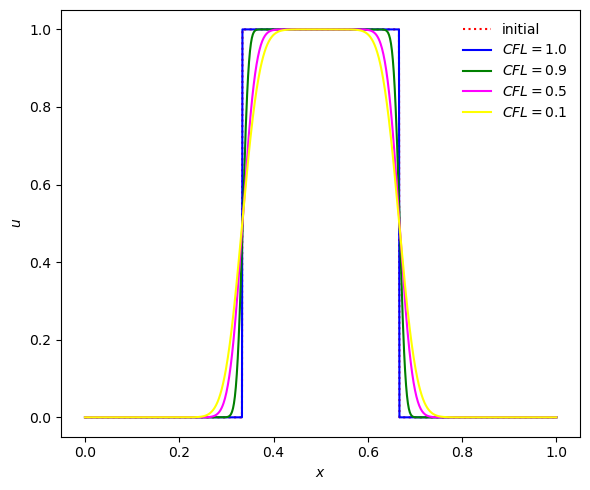

In [29]:
# Plot the initial profile

plt.figure(figsize=(6,5))
plt.plot(x[ng:ng+nx], s_t01[ng:ng+nx], ls=":", color = 'red', label="initial")

plt.plot(x[ng:ng+nx], s_tf1[ng:ng+nx], color = 'blue', label=r"$CFL = {}$".format(CFL1))
plt.plot(x[ng:ng+nx], s_tf2[ng:ng+nx], color = 'green', label=r"$CFL = {}$".format(CFL2))
plt.plot(x[ng:ng+nx], s_tf3[ng:ng+nx], color = 'magenta', label=r"$CFL = {}$".format(CFL3))
plt.plot(x[ng:ng+nx], s_tf4[ng:ng+nx], color = 'yellow', label=r"$CFL = {}$".format(CFL4))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

# Fixed CFL number and different times:

In [30]:
# Call the function:

# For CFL = 1, Period = 1
CFL = 0.9
factor1 = 1.
s_t01, s_tf1 = upwind_method(CFL, factor1)

# For CFL = 0.9, Period = 2
factor2 = 2.
s_t02, s_tf2 = upwind_method(CFL, factor2)

# For CFL = 0.5, Period = 3
factor3 = 3.
s_t03, s_tf3 = upwind_method(CFL, factor3)

# For CFL = 0.1, Period = 4
factor4 = 4.
s_t04, s_tf4 = upwind_method(CFL, factor4)


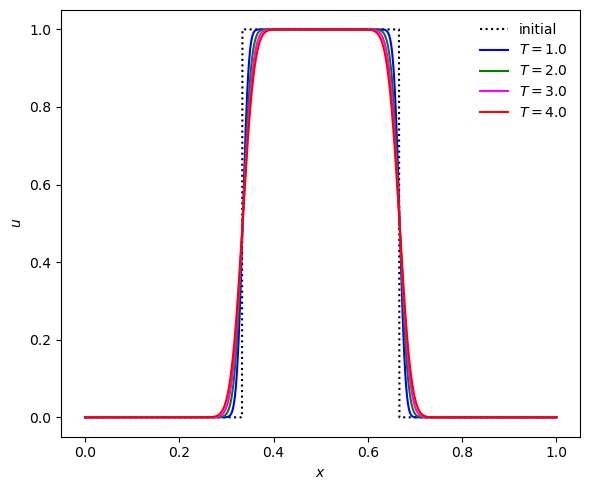

In [31]:
# Plot the initial profile

plt.figure(figsize=(6,5))
plt.plot(x[ng:ng+nx], s_t01[ng:ng+nx], ls=":", color = 'black', label="initial")

plt.plot(x[ng:ng+nx], s_tf1[ng:ng+nx], color = 'blue', label=r"$T = {}$".format(factor1))
plt.plot(x[ng:ng+nx], s_tf2[ng:ng+nx], color = 'green', label=r"$T = {}$".format(factor2))
plt.plot(x[ng:ng+nx], s_tf3[ng:ng+nx], color = 'magenta', label=r"$T = {}$".format(factor3))
plt.plot(x[ng:ng+nx], s_tf4[ng:ng+nx], color = 'red', label=r"$T = {}$".format(factor4))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()